In [41]:
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd
import math
from IPython.display import Image

In [30]:
plotly.tools.set_credentials_file(username='xjiang36', api_key='uZyWsdSH3xd9bxUefIFf')

In [123]:
import plotly.plotly as py
from plotly.graph_objs import *
import pandas as pd

# read in volcano database data
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano_db.csv')
df = pd.read_csv('t3sample.csv',encoding='iso-8859-1')
colnames=df.columns.values
# frequency of Country
#freq = df
#freq = freq.Country.value_counts().reset_index().rename(columns={'index': 'x'})
freq=df[colnames[4]].value_counts().reset_index().rename(columns={'index': 'x'})
# plot(1) top 10 countries by total volcanoes
freqcol=freq.columns.values

colorbar=["#FF0000","#FF8000","#FFFF00","#80FF00","#00FF00","#00FF80","#00FFFF","#0080FF","#0000FF","#7F00FF","#FF00FF","#FF007F","#808080"]
colorbars=[]

for i in range(len(df[colnames[4]])):
    for j in range(len(freq)):
        if df[colnames[4]][i]==freq["x"][j]:
            if j<12:
                colorbars.append(colorbar[j])
            else:
                colorbars.append(colorbar[12])

sizes=[]
for i in range(len(df[colnames[7]])):
    if df[colnames[7]][i]>df[colnames[7]].median():
        if df[colnames[7]][i]>(df[colnames[7]][df[colnames[7]]>df[colnames[7]].median()].median()):
            sizes.append(10)
        else:
            sizes.append(7.5)
    else:
        if df[colnames[7]][i]>(df[colnames[7]][df[colnames[7]]<df[colnames[7]].median()].median()):
            sizes.append(5)
        else:
            sizes.append(2.5)




locations = Bar(x=freq['x'][0:10],y=freq[freqcol[1]][0:10], marker=dict(color=colorbar))

# read in 3d volcano surface data
#df_v = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')

# plot(2) 3d surface of volcano
#threed = Surface(z=df_v.values.tolist(), colorscale='Reds', showscale=False)
#logsizes=[]
#for i in range(len(df[colnames[4]])):
#    logsize=math.log10(float(df[colnames[5]][i]))
#    logsize=logsize*1.5
#    logsizes.append(logsize)



# plot(3)  scattergeo map of volcano locations
trace3 = {
  "geo": "geo3", 
  "lon": df[colnames[3]],
  "lat": df[colnames[2]],
  "hoverinfo": 'text',
  "marker": {
    "size": sizes,
    "opacity": 0.8,
    "color": colorbars,
    "colorscale": 'Viridis'
  }, 
  "mode": "markers", 
  "type": "scattergeo"
}

data = Data([locations, trace3])

# control the subplot below using domain in 'geo', 'scene', and 'axis'
layout = {
  "plot_bgcolor": 'black',
  "paper_bgcolor": 'black',
  "titlefont": {
      "size": 20,
      "family": "Raleway"
  },
  "font": {
      "color": 'white'
  },
  "dragmode": "zoom", 
  "geo3": {
    "domain": {
      "x": [0, 0.55], 
      "y": [0, 0.9]
    }, 
    "lakecolor": "rgba(127,205,255,1)",
    "oceancolor": "rgb(6,66,115)",
    "landcolor": 'white',
    "projection": {"type": "orthographic"}, 
    "scope": "world", 
    "showlakes": True,
    "showocean": True,
    "showland": True,
    "bgcolor": 'black'
  }, 
  "margin": {
    "r": 10, 
    "t": 25, 
    "b": 40, 
    "l": 60
  }, 
  "scene": {"domain": {
      "x": [0.5, 1], 
      "y": [0, 0.55]
    },
           "xaxis": {"gridcolor": 'white'},
           "yaxis": {"gridcolor": 'white'},
           "zaxis": {"gridcolor": 'white'}
           }, 
  "showlegend": False, 
  "title": "<br>Distribution of %s" % colnames[5], 
  "xaxis": {
    "anchor": "y", 
    "domain": [0.6, 0.95]
  }, 
  "yaxis": {
    "anchor": "x", 
    "domain": [0.1, 0.9],
    "showgrid": False
  }
}

annotations = { "text": "Histrogram of %s" % colnames[5],
               "showarrow": False,
               "xref": "paper",
               "yref": "paper",
               "x": 0.85,
               "y": 0.95}

annotations2 = { "text": "By Whale Team",
               "showarrow": False,
               "xref": "paper",
               "yref": "paper",
               "x": 0,
               "y": 0}

layout['annotations'] = [annotations,annotations2]

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename = "Mixed Subplots Volcano")

In [47]:
def visulize(dataset):
    df = pd.read_csv(dataset,encoding='iso-8859-1')
    
    colnames=df.columns.values
    # frequency of Country
    #freq = df
    #freq = freq.Country.value_counts().reset_index().rename(columns={'index': 'x'})
    freq=df[colnames[4]].value_counts().reset_index().rename(columns={'index': 'x'})
    # plot(1) top 10 countries by total volcanoes
    freqcol=freq.columns.values
    locations = Bar(x=freq['x'][0:10],y=freq[freqcol[1]][0:10], marker=dict(color='#CF1020'))
    
    # read in 3d volcano surface data
    #df_v = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv')
    
    # plot(2) 3d surface of volcano
    #threed = Surface(z=df_v.values.tolist(), colorscale='Reds', showscale=False)
    #logsizes=[]
    #for i in range(len(df[colnames[4]])):
    #    logsize=math.log10(float(df[colnames[5]][i]))
    #    logsize=logsize*1.5
    #    logsizes.append(logsize)
    
    # plot(3)  scattergeo map of volcano locations
    trace3 = {
        "geo": "geo3", 
        "lon": df[colnames[3]],
        "lat": df[colnames[2]],
        "hoverinfo": 'text',
        "marker": {
            "size": df[colnames[5]],
            "opacity": 0.8,
            "color": '#CF1020',
            "colorscale": 'Viridis'
        }, 
        "mode": "markers", 
        "type": "scattergeo"
    }
    
    data = Data([locations, trace3])
    
    # control the subplot below using domain in 'geo', 'scene', and 'axis'
    layout = {
        "plot_bgcolor": 'black',
        "paper_bgcolor": 'black',
        "titlefont": {
            "size": 20,
            "family": "Raleway"
        },
        "font": {
            "color": 'white'
        },
        "dragmode": "zoom", 
        "geo3": {
            "domain": {
                "x": [0, 0.55], 
                "y": [0, 0.9]
            },
            "lakecolor": "rgba(127,205,255,1)",
            "oceancolor": "rgb(6,66,115)",
            "landcolor": 'white',
            "projection": {"type": "orthographic"}, 
            "scope": "world", 
            "showlakes": True,
            "showocean": True,
            "showland": True,
            "bgcolor": 'black'
        }, 
        "margin": {
            "r": 10, 
            "t": 25, 
            "b": 40, 
            "l": 60
        }, 
        "scene": {"domain": {
            "x": [0.5, 1], 
            "y": [0, 0.55]
        },
                  "xaxis": {"gridcolor": 'white'},
                  "yaxis": {"gridcolor": 'white'},
                  "zaxis": {"gridcolor": 'white'}
                 }, 
        "showlegend": False, 
        "title": "<br>Distribution of %s" % colnames[5], 
        "xaxis": {
            "anchor": "y", 
            "domain": [0.6, 0.95]
        }, 
        "yaxis": {
            "anchor": "x", 
            "domain": [0.1, 0.9],
            "showgrid": False
        }
    }
    
    annotations = { "text": "Histrogram of %s" % colnames[5],
                   "showarrow": False,
                   "xref": "paper",
                   "yref": "paper",
                   "x": 0.85,
                   "y": 0.95}
    
    annotations2 = { "text": "By Whale Team",
                    "showarrow": False,
                    "xref": "paper",
                    "yref": "paper",
                    "x": 0,
                    "y": 0}
    
    
    
    
    layout['annotations'] = [annotations,annotations2]
    fig = Figure(data=data, layout=layout)
    #py.iplot(fig, filename = "Mixed Subplots Volcano")
    py.image.save_as(fig,'chris-plot.png')
    
    
    
    

#Image('chris-plot.png')
    #py.offline.plot(fig, filename = "Mixed Subplots Volcano")

In [48]:
visulize("t3sample.csv")

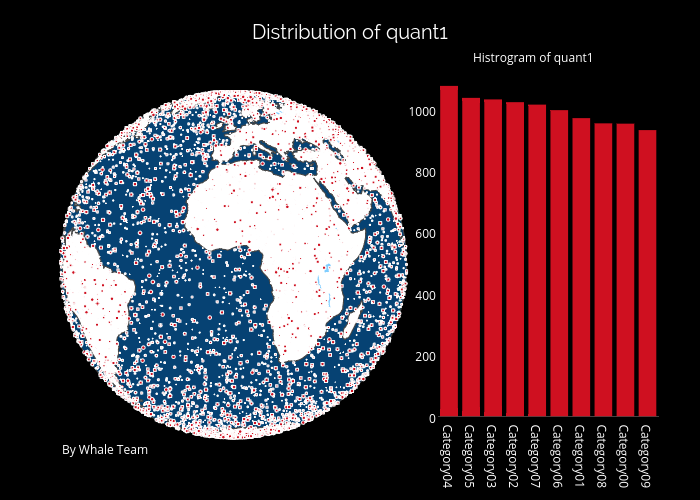

In [49]:
Image('chris-plot.png')

In [103]:
colorbar=["#FF0000","#FF8000","#FFFF00","#80FF00","#00FF00","#00FF80","#00FFFF","#0080FF","#0000FF","#7F00FF","#FF00FF","#FF007F","#808080"]
colorbars=[]

for i in range(len(df[colnames[4]])):
    for j in range(len(freq)):
        if df[colnames[4]][i]==freq["x"][j]:
            if j<12:
                colorbars.append(colorbar[j])
            else:
                colorbars.append(colorbar[12])


In [102]:
len(freq)

10

In [68]:
df[colnames[6]].max()-df[colnames[6]].min()

59.973812410000001

In [69]:
df[colnames[7]].max()-df[colnames[7]].min()

9998.6528708450005

In [78]:
if df[colnames[7]].max()<0:
    df[colnames[7]]+(0-df[colnames[7]].min()+1)
else:
    df[colnames[7]]+df[colnames[7]].max()

In [94]:
df[colnames[7]].median()

4920.907778999999

In [95]:
sizes=[]
for i in range(len(df[colnames[7]])):
    if df[colnames[7]][i]>df[colnames[7]].median():
        if df[colnames[7]][i]>(df[colnames[7]][df[colnames[7]]>df[colnames[7]].median()].median()):
            sizes.append(10)
        else:
            sizes.append(7.5)
    else:
        if df[colnames[7]][i]>(df[colnames[7]][df[colnames[7]]<df[colnames[7]].median()].median()):
            sizes.append(5)
        else:
            sizes.append(2.5)

In [96]:
sizes

[7.5,
 2.5,
 2.5,
 5,
 7.5,
 10,
 10,
 10,
 5,
 2.5,
 2.5,
 7.5,
 2.5,
 5,
 7.5,
 7.5,
 7.5,
 7.5,
 5,
 7.5,
 2.5,
 5,
 2.5,
 10,
 10,
 10,
 10,
 10,
 5,
 2.5,
 5,
 7.5,
 2.5,
 7.5,
 10,
 2.5,
 7.5,
 7.5,
 10,
 7.5,
 7.5,
 7.5,
 2.5,
 5,
 2.5,
 7.5,
 5,
 10,
 2.5,
 7.5,
 5,
 10,
 2.5,
 2.5,
 5,
 10,
 10,
 7.5,
 7.5,
 7.5,
 10,
 7.5,
 5,
 7.5,
 5,
 2.5,
 2.5,
 2.5,
 5,
 5,
 7.5,
 10,
 7.5,
 5,
 10,
 7.5,
 10,
 7.5,
 10,
 7.5,
 10,
 5,
 10,
 2.5,
 10,
 10,
 7.5,
 2.5,
 5,
 10,
 10,
 5,
 2.5,
 5,
 2.5,
 2.5,
 7.5,
 10,
 2.5,
 2.5,
 7.5,
 2.5,
 5,
 5,
 10,
 5,
 2.5,
 10,
 7.5,
 10,
 10,
 5,
 5,
 10,
 10,
 2.5,
 5,
 5,
 2.5,
 5,
 5,
 5,
 10,
 10,
 5,
 10,
 2.5,
 7.5,
 5,
 10,
 7.5,
 10,
 10,
 10,
 10,
 7.5,
 10,
 10,
 2.5,
 7.5,
 10,
 2.5,
 10,
 7.5,
 10,
 7.5,
 5,
 5,
 5,
 10,
 2.5,
 5,
 5,
 7.5,
 2.5,
 7.5,
 7.5,
 7.5,
 7.5,
 2.5,
 2.5,
 2.5,
 10,
 7.5,
 5,
 5,
 10,
 2.5,
 7.5,
 2.5,
 10,
 2.5,
 7.5,
 2.5,
 2.5,
 7.5,
 7.5,
 2.5,
 5,
 2.5,
 10,
 10,
 7.5,
 7.5,
 2.5,
 2.5,
 10,
 10,
 7.5,

In [109]:
df[colnames[4]]

0       Category01
1       Category00
2       Category04
3       Category03
4       Category05
5       Category00
6       Category04
7       Category04
8       Category07
9       Category09
10      Category01
11      Category01
12      Category05
13      Category08
14      Category09
15      Category02
16      Category09
17      Category00
18      Category02
19      Category09
20      Category09
21      Category05
22      Category09
23      Category08
24      Category09
25      Category07
26      Category00
27      Category06
28      Category02
29      Category07
           ...    
9970    Category01
9971    Category02
9972    Category02
9973    Category08
9974    Category03
9975    Category03
9976    Category05
9977    Category03
9978    Category07
9979    Category02
9980    Category03
9981    Category02
9982    Category03
9983    Category05
9984    Category04
9985    Category05
9986    Category09
9987    Category00
9988    Category03
9989    Category00
9990    Category03
9991    Cate

In [110]:
colorbars

['#00FFFF',
 '#0000FF',
 '#FF0000',
 '#FFFF00',
 '#FF8000',
 '#0000FF',
 '#FF0000',
 '#FF0000',
 '#00FF00',
 '#7F00FF',
 '#00FFFF',
 '#00FFFF',
 '#FF8000',
 '#0080FF',
 '#7F00FF',
 '#80FF00',
 '#7F00FF',
 '#0000FF',
 '#80FF00',
 '#7F00FF',
 '#7F00FF',
 '#FF8000',
 '#7F00FF',
 '#0080FF',
 '#7F00FF',
 '#00FF00',
 '#0000FF',
 '#00FF80',
 '#80FF00',
 '#00FF00',
 '#00FF80',
 '#00FF00',
 '#FF0000',
 '#0000FF',
 '#00FF80',
 '#FF8000',
 '#00FFFF',
 '#00FFFF',
 '#FFFF00',
 '#FF8000',
 '#00FF80',
 '#FFFF00',
 '#0000FF',
 '#0000FF',
 '#00FF80',
 '#0000FF',
 '#0000FF',
 '#00FFFF',
 '#0080FF',
 '#7F00FF',
 '#0000FF',
 '#FF0000',
 '#7F00FF',
 '#7F00FF',
 '#FFFF00',
 '#00FFFF',
 '#FF0000',
 '#FF8000',
 '#00FF80',
 '#7F00FF',
 '#FFFF00',
 '#FF0000',
 '#00FF00',
 '#00FF80',
 '#00FFFF',
 '#FF0000',
 '#00FF80',
 '#00FF80',
 '#00FFFF',
 '#0080FF',
 '#80FF00',
 '#00FF00',
 '#0080FF',
 '#0080FF',
 '#80FF00',
 '#80FF00',
 '#00FF80',
 '#7F00FF',
 '#FF0000',
 '#FFFF00',
 '#00FF00',
 '#FFFF00',
 '#80FF00',
 '#0

In [112]:
freqc=colorbars.value_counts().reset_index().rename(columns={'index': 'x'})

AttributeError: 'list' object has no attribute 'value_counts'

In [119]:
len(freq)

for i in range(len(freq)):
    

10

In [117]:
for i in range(len(freq)):
    for j in range(len(freq)):
        if df[colnames[4]][i]==freq["x"][j]:
            if j<12:
                colorbars.append(colorbar[j])
            else:
                colorbars.append(colorbar[12])

['#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0000FF',
 '#0

In [121]:
colorbars[0:9]

['#00FFFF',
 '#0000FF',
 '#FF0000',
 '#FFFF00',
 '#FF8000',
 '#0000FF',
 '#FF0000',
 '#FF0000',
 '#00FF00']